#### Загрузка пакетов


In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Загрузка данных

In [2]:
data = pd.read_excel(r'C:\Users\Credu\Downloads\data_purch.xlsx')

######  Описание данных

* first_pub_date – дата публикации процедуры
* final_protocol_pub_date – дата завершения процедуры
* purchase_number – идентификатор процедуры
* collecting_start_date – дата начала сбора заявок от потенциальных поставщиков
* collecting_end_date – дата окончания сбора заявок от потенциальных поставщиков
* placing_base_name – форма проведения торгов (конкурс, аукцион и т.п.)
* cust_reg – регион заказчика процедуры
* lot_price_correct – максимально возможная, объявленная заказчиком, цена за все препараты в закупке
* drug_mnn_ext_code – идентификатор лекарственного препарата
* drug_mnn_name – наименование лекарственного препарата (их меньше, чем drug_mnn_ext_code)
* drug_qty – объем закупаемого лекарственного препарата
* drug_price – цена за единицу объема закупаемого лекарственного препарата
* drug_position_price – цена за всю позицию закупаемого лекарственного препарата
* ftg – класс закупаемого лекарственного препарата
* is_abnd – фиктивная переменная: 1 – закупка не состоялась, 0 – состоялась
* is_znvlp – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат из списка ЖВЛП, 0 – не содержатся
* is_narcotic – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, в составе которого есть наркотические вещества, 0 – не содержатся
* is_msp_purchase – фиктивная переменная: 1 – закупка предназначена только для субъектов малого и среднего предпринимательства, 0 – не предназначена
* is_povt – фиктивная переменная: 1 – эту процедуру заказчик вынужден повторить, 0 – не повторная
* is_dif – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, являющийся дефицитным, 0 – не содержатся
* app_amount_absolute_correct – сумма залога
* advance_sum_correct – сумма аванса

In [3]:
data

,first_pub_date,final_protocol_pub_date,purchase_number,collecting_start_date,collecting_end_date,placing_base_name,cust_reg,lot_price_correct,drug_mnn_ext_code,drug_mnn_name,...,drug_position_price,ftg,is_abnd,is_znvlp,is_narcotic,is_msp_purchase,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct
0,2021-03-30,2021-04-12,AA0000001,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,56040.00,5d6d137c-75b7-11ea-b5ac-1b70cb6e9621,ИНТЕРФЕРОН АЛЬФА-2B,...,56040.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
1,2021-03-30,2021-04-12,AB0000002,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,57720.00,5d6e26f4-75b7-11ea-b5ac-3b4e2912a2c3,ИНТЕРФЕРОН АЛЬФА-2B,...,57720.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
2,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb1f40-bf5b-11e9-bd5d-c33c05f32457,БУДЕСОНИД,...,33096.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
3,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb3a20-bf5b-11e9-bd5d-07a90f4fd9f6,БУДЕСОНИД+ФОРМОТЕРОЛ,...,225828.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
4,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb168a-bf5b-11e9-bd5d-5725ca76550a,МОКСОНИДИН,...,10123.68,Препараты гипотензивные,0,1,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556307,2021-07-27,2021-08-06,AB0166842,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,221775.00,1ed99ddc-bf5b-11e9-bd5d-d70987c26fdc,ЖЕЛЕЗА [III] ГИДРОКСИД САХАРОЗНЫЙ КОМПЛЕКС,...,221775.00,Препараты антианемические,0,1,0,0,0,0,0.0,0.0
556308,2021-07-27,2021-08-05,AD0166843,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,27163.50,1ee4a07e-bf5b-11e9-bd5d-f377aa802c38,МЕТИОНИЛ-ГЛУТАМИЛ-ГИСТИДИЛ-ФЕНИЛАЛАНИЛ-ПРОЛИЛ-...,...,27163.50,Психоаналептики,1,1,0,0,1,0,0.0,0.0
556309,2021-07-27,2021-08-05,AX0166844,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,81400.00,1edbbc5c-bf5b-11e9-bd5d-2357606213ac,ПИПЕКУРОНИЯ БРОМИД,...,81400.00,Миорелаксанты,1,1,0,0,1,0,0.0,0.0
556310,2021-07-27,2021-08-05,BZ0166845,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,13475.00,1edc2494-bf5b-11e9-bd5d-27d8cd2613fd,СУКСАМЕТОНИЯ ХЛОРИД,...,13475.00,Миорелаксанты,1,1,0,0,1,0,0.0,0.0


In [4]:
data['avg_lot_price_per_bidder'] = data.groupby('purchase_number')['lot_price_correct'].transform('mean') / data.groupby('purchase_number')['cust_reg'].transform('nunique')


In [5]:
data.columns

Index(['first_pub_date', 'final_protocol_pub_date', 'purchase_number',
       'collecting_start_date', 'collecting_end_date', 'placing_base_name',
       'cust_reg', 'lot_price_correct', 'drug_mnn_ext_code', 'drug_mnn_name',
       'drug_qty', 'drug_price', 'drug_position_price', 'ftg', 'is_abnd',
       'is_znvlp', 'is_narcotic', 'is_msp_purchase', 'is_povt', 'is_dif',
       'app_amount_absolute_correct', 'advance_sum_correct',
       'avg_lot_price_per_bidder'],
      dtype='object')

In [6]:
data.dtypes

first_pub_date                 datetime64[ns]
final_protocol_pub_date        datetime64[ns]
purchase_number                        object
collecting_start_date          datetime64[ns]
collecting_end_date            datetime64[ns]
placing_base_name                      object
cust_reg                               object
lot_price_correct                     float64
drug_mnn_ext_code                      object
drug_mnn_name                          object
drug_qty                              float64
drug_price                            float64
drug_position_price                   float64
ftg                                    object
is_abnd                                 int64
is_znvlp                                int64
is_narcotic                             int64
is_msp_purchase                         int64
is_povt                                 int64
is_dif                                  int64
app_amount_absolute_correct           float64
advance_sum_correct               

In [7]:
data.isna().sum()

first_pub_date                    0
final_protocol_pub_date           0
purchase_number                   0
collecting_start_date             0
collecting_end_date               0
placing_base_name                 0
cust_reg                          0
lot_price_correct                 0
drug_mnn_ext_code                 0
drug_mnn_name                     0
drug_qty                       5159
drug_price                        0
drug_position_price            5159
ftg                               0
is_abnd                           0
is_znvlp                          0
is_narcotic                       0
is_msp_purchase                   0
is_povt                           0
is_dif                            0
app_amount_absolute_correct       0
advance_sum_correct               0
avg_lot_price_per_bidder          0
dtype: int64



Я считаю, что наибольшее влияние на вероятность незакрытия закупки оказывают следующие факторы:

Lot_price_correct - максимально возможная, объявленная заказчиком, цена за все препараты в закупке. Чем выше цена, тем меньше вероятность того, что найдется поставщик, готовый выполнить заказ по данной цене.

Collecting_end_date - дата окончания сбора заявок от потенциальных поставщиков. Если заказчик не смог привлечь достаточное количество поставщиков, то это может привести к незакрытию закупки.

Is_abnd - фиктивная переменная, которая указывает, состоялась ли закупка или нет. Если закупка не состоялась в прошлый раз, то это может повлиять на вероятность незакрытия закупки в будущем.

Is_povt - фиктивная переменная, которая указывает, повторная ли это процедура. Если это повторная процедура, то это может указывать на то, что заказчик не смог найти поставщика в первый раз, что может повлиять на вероятность незакрытия закупки.

#### Группировка


In [8]:
grouped_data = data.groupby('purchase_number').agg({'is_abnd': 'max',
                                                                   'lot_price_correct': 'sum',
                                                                   'drug_qty': 'sum',
                                                                   'drug_price': 'mean', 
                                                                    'avg_lot_price_per_bidder': 'mean'
                                                                   })

In [9]:
grouped_data

,is_abnd,lot_price_correct,drug_qty,drug_price,avg_lot_price_per_bidder
purchase_number,,,,,
AA0000001,0,56040.00,2000.0,28.020000,56040.00
AA0000006,0,9960262.00,5832558.0,1.724231,383087.00
AA0000011,1,2788023.75,53560.1,7.326000,185868.25
AA0000016,0,4888341.00,192980.0,4.014333,162944.70
AA0000021,0,261544.68,6300.0,19.950600,130772.34
...,...,...,...,...,...
BZ0166825,0,768000.00,560000.0,2.100000,384000.00
BZ0166830,0,56835.00,13500.0,4.210000,56835.00
BZ0166835,1,11880.00,3000.0,3.960000,11880.00


#### Формирование факторов
###### Фактор, полученный с помощью метода главных компонент:

Фактор `new_feature` - это фактор, полученный с помощью метода главных компонент из исходных столбцов с информацией о покупках. Этот фактор является линейной комбинацией исходных факторов, которые наилучшим образом объясняют вариацию в данных.

###### Факторы, полученные с помощью замен и арифметических операций:

Фактор `avg_lot_price_per_bidder` - Средняя стоимость лота на участника закупки. Более высокая стоимость лота на участника может сигнализировать о более крупных и надежных поставщиках

Фактор `total_drug_cost` - это фактор, который представляет суммарную стоимость всех препаратов в этой покупке. Он вычисляется как произведение стоимости одной единицы препарата на количество препаратов, приобретенных в этой покупке.

In [10]:
pca = PCA(n_components=1)
new_feature = pca.fit_transform(grouped_data)
grouped_data['new_feature'] = new_feature

In [11]:
grouped_data['total_drug_cost'] = grouped_data['drug_qty'] * grouped_data['drug_price']


In [12]:
grouped_data.dtypes

is_abnd                       int64
lot_price_correct           float64
drug_qty                    float64
drug_price                  float64
avg_lot_price_per_bidder    float64
new_feature                 float64
total_drug_cost             float64
dtype: object

#### Разделяем на обучающую и тестовую выборки

In [13]:

grouped_data.dropna(subset=['is_abnd'], inplace=True)
# Выделение случайной выборки размера n
n = 69000
sample = grouped_data.sample(n)

# Разделение выборки на обучающую и тестовую
test_size = 0.1 # 10% тестовая выборка
train, test = train_test_split(sample, test_size=test_size, random_state=42)

# Проверка размеров выборок
print(f"Размер обучающей выборки: {train.shape[0]}")
print(f"Размер тестовой выборки: {test.shape[0]}")

# Разделение выборки на признаки и целевую переменную
X_train, X_test, y_train, y_test = train.drop('is_abnd', axis=1), test.drop('is_abnd', axis=1), train['is_abnd'], test['is_abnd']


Размер обучающей выборки: 62100
Размер тестовой выборки: 6900


#### Оценка  важности  выделенных  факторов  на  основе  метода "Случайного леса" 

                    feature  importance
3  avg_lot_price_per_bidder    0.275099
2                drug_price    0.237893
4               new_feature    0.141474
0         lot_price_correct    0.131567
5           total_drug_cost    0.122212
1                  drug_qty    0.091755


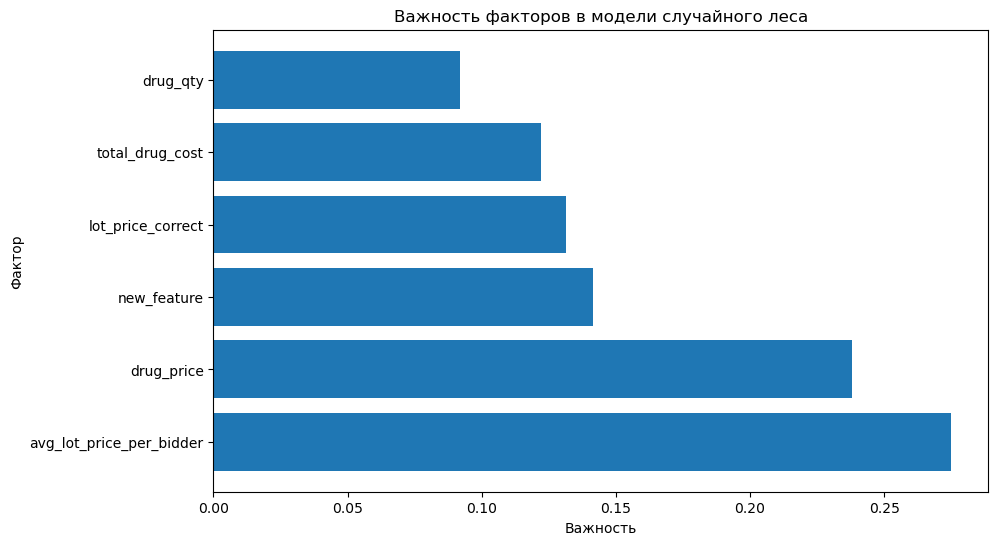

Наиболее важные факторы: ['avg_lot_price_per_bidder', 'drug_price', 'new_feature', 'lot_price_correct', 'total_drug_cost']


In [14]:
#Создание модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Обучение модели на обучающей выборке
rf.fit(X_train, y_train)

#Получение важности факторов
importances = rf.feature_importances_

#Сохранение важности факторов в датафрейм и сортировка по убыванию
df_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values('importance', ascending=False)

#Вывод 10 наиболее важных факторов
print(df_importances.head(10))

#Построение графика важности факторов
plt.figure(figsize=(10,6))
plt.barh(df_importances['feature'], df_importances['importance'])
plt.xlabel('Важность')
plt.ylabel('Фактор')
plt.title('Важность факторов в модели случайного леса')
plt.show()

#Вывод наиболее важных факторов
top_factors = df_importances.head(5)['feature'].values.tolist()
print(f"Наиболее важные факторы: {top_factors}")

#### Построение модели логистической регрессии

In [15]:

#Создание модели логистической регрессии и обучение ее на обучающей выборке
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Предсказание на обучающей и тестовой выборках
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

#Оценка точности на обучающей и тестовой выборках
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Точность модели на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность модели на тестовой выборке: {test_accuracy:.4f}")

Точность модели на обучающей выборке: 0.5055
Точность модели на тестовой выборке: 0.5028


Данные результаты говорят о том, что точность модели на тестовой выборке не сильно отличается от точности на обучающей выборке. Однако, точность модели на обеих выборках достаточно низкая (50.55% на обучающей выборке и 50.28% на тестовой выборке), что может указывать на то, что модель не обладает высокой способностью к обобщению на новые данные. 